<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Полиномиальные модели***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Парная регрессия

Датасет

In [4]:
data = pd.read_csv("gen_regression.csv", index_col=0)

In [5]:
data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


In [6]:
X, y = pd.DataFrame(data.x), data.y

In [7]:
X.shape, y.shape

((100, 1), (100,))

График зависимости между атрибутой X и целевой переменной y

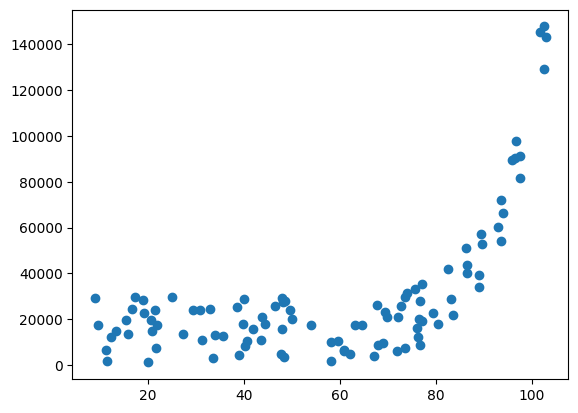

In [8]:
plt.scatter(X, y)

Линейная модель

In [9]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


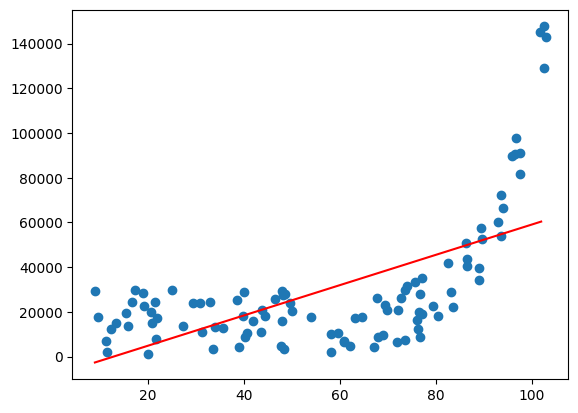

In [10]:
plt.scatter(X, y)

#Генерируем данные для равномерного распердления точек
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))

#Вместо DataFrame можно использовать reshape(-1, 1)
yy = linear.predict(pd.DataFrame(xx))
plt.plot(xx, yy, c='r')

In [11]:
sc = linear.score(X, y)

if (sc < 0.5):
  print(f"Данная модель имеет низкую точность: {sc*100:.2f}%")

Данная модель имеет низкую точность: 37.47%


Полиномиальна регрессия второго порядка

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
#дата сет будет добавлять признаки 2 порядка

transformation = PolynomialFeatures(degree=2)
transformation.fit(X)

PolynomialFeatures()

In [14]:
X_2 = transformation.transform(X)

print(f"Текуйщие размер датасета: {X_2.shape}")
print(f"Некоторые данные датасета: {X_2[:5]}")

Текуйщие размер датасета: (100, 3)
Некоторые данные датасета: [[1.00000000e+00 9.65977805e+01 9.33113119e+03]
 [1.00000000e+00 4.80028921e+01 2.30427765e+03]
 [1.00000000e+00 4.79397558e+01 2.29822018e+03]
 [1.00000000e+00 4.78090258e+01 2.28570295e+03]
 [1.00000000e+00 6.97844271e+01 4.86986627e+03]]


Точность модели: 0.7359753787024842


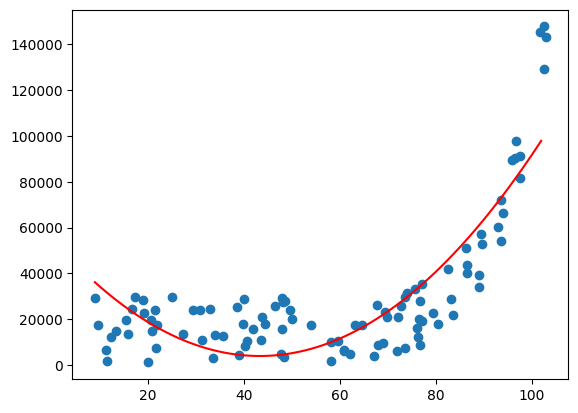

In [15]:
poly_2d = LinearRegression().fit(X_2, y)

print(f"Точность модели: {poly_2d.score(X_2, y)}")

#Добавляем полимиальные признаки
xx_df = pd.DataFrame(xx, columns=X.columns)
xx_2d = transformation.transform(xx_df)

yy = poly_2d.predict(xx_2d)
plt.scatter(X, y)
plt.plot(xx, yy, c='r')

In [16]:
import time

def train_poly_model(X, y, deg):
  transformation_n = PolynomialFeatures(degree=deg)
  X_n = transformation_n.fit_transform(X)

  start = time.time()
  poly_nd = LinearRegression().fit(X_n, y)
  end = time.time()

  sc_n = poly_nd.score(X_n, y)
  tm_n = end - start

  xx_ndf = pd.DataFrame(xx, columns=X.columns)
  xx_nd = transformation_n.transform(xx_ndf)
  yy = poly_nd.predict(xx_nd)

  plt.figure(figsize=(8, 4))
  plt.scatter(X, y, alpha=0.4, label="Данные")
  plt.plot(xx, yy, c='r', label=f"Полином степени {deg}")
  plt.title(f"Полиномиальная регрессия степени {deg}")
  plt.legend()
  plt.show()

  return poly_nd, sc_n, tm_n

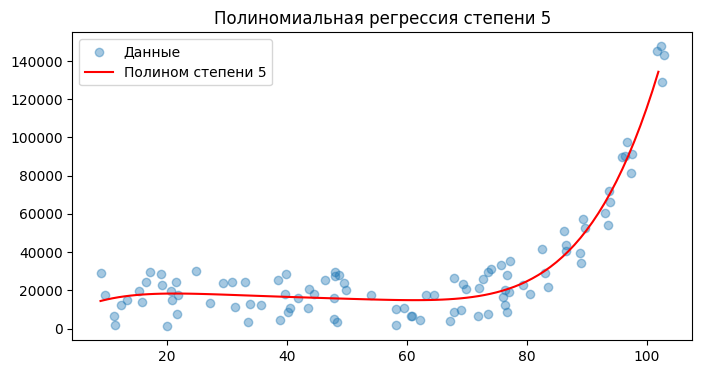

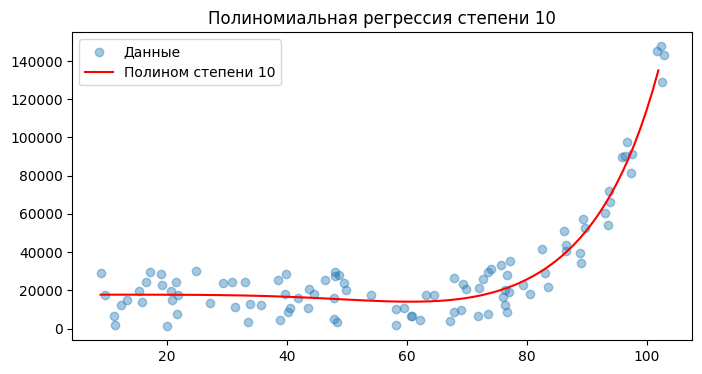

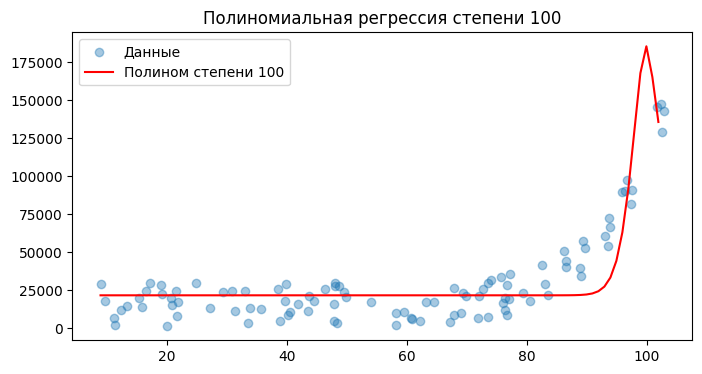

   Степень полинома  Точность (R², %)  Время обучения (сек)
0                 5             92.17                0.0013
1                10             92.22                0.0017
2               100             79.25                0.0031


In [17]:
degree = [5, 10, 100]
results = []

for deg in degree:
  poly_n, sc_n, tm_n = train_poly_model(X, y, deg)
  results.append({
    "Степень полинома": deg,
    "Точность (R², %)": round(sc_n * 100, 2),
    "Время обучения (сек)": round(tm_n, 4)
  })

df_results = pd.DataFrame(results)
print(df_results)

Классификация

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [19]:
data.describe()

,x1,x2,y
count,250.000000,250.000000,250.000000
mean,0.519147,0.261688,0.500000
std,0.946039,0.577398,0.501003
min,-1.500951,-1.062020,0.000000
25%,-0.111585,-0.178776,0.000000
50%,0.484685,0.227917,0.500000
75%,1.196812,0.690127,1.000000
max,2.633769,1.553934,1.000000


In [20]:
X, y = data.drop(["y"], axis=1), data.y
X.shape, y.shape

((250, 2), (250,))

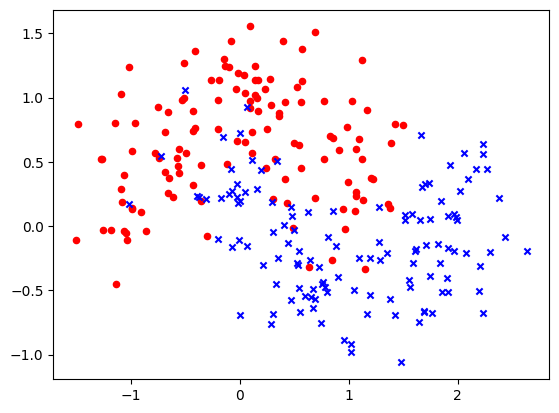

In [21]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=20)

Линейная модель

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic = LogisticRegression().fit(X, y)

print(f"Точность модели: {logistic.score(X, y)*100:.1f} %")

Точность модели: 83.2 %


График модели

<ipython-input-24-54d4bf18be1d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-24-54d4bf18be1d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


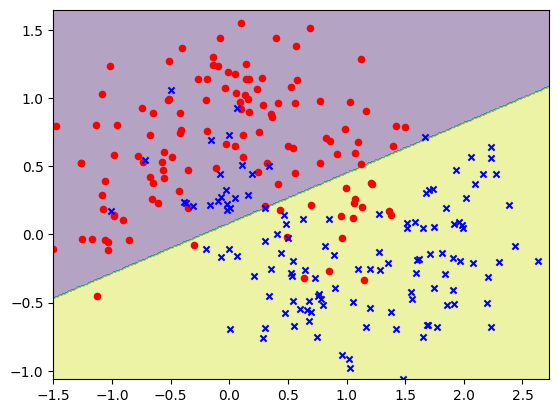

In [24]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=20)

Полиномиальна регрессия второго порядка

In [25]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

print(f"Текуйщие размер датасета: {X_3.shape}")
print(f"Некоторые данные датасета: {X_3[:5]}")

Текуйщие размер датасета: (250, 9)
Некоторые данные датасета: [[ 4.82885400e-02  2.67592140e-01  2.33178309e-03  1.29216338e-02
   7.16055536e-02  1.12598401e-04  6.23966829e-04  3.45772764e-03
   1.91610834e-02]
 [ 1.36315053e+00  1.71122525e-01  1.85817938e+00  2.33265761e-01
   2.92829185e-02  2.53297821e+00  3.17976347e-01  3.99170260e-02
   5.01096696e-03]
 [-4.24253357e-01  8.93937129e-01  1.79990911e-01 -3.79255828e-01
   7.99123591e-01 -7.63617484e-02  1.60900558e-01 -3.39030866e-01
   7.14366249e-01]
 [ 1.12344209e-01  5.65671502e-01  1.26212213e-02  6.35499174e-02
   3.19984248e-01  1.41792112e-03  7.13946521e-03  3.59483772e-02
   1.81005970e-01]
 [-1.26245252e+00  5.21735313e-01  1.59378635e+00 -6.58666059e-01
   2.72207737e-01 -2.01207959e+00  8.31534623e-01 -3.43649343e-01
   1.42020389e-01]]


Точность модели: 90.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


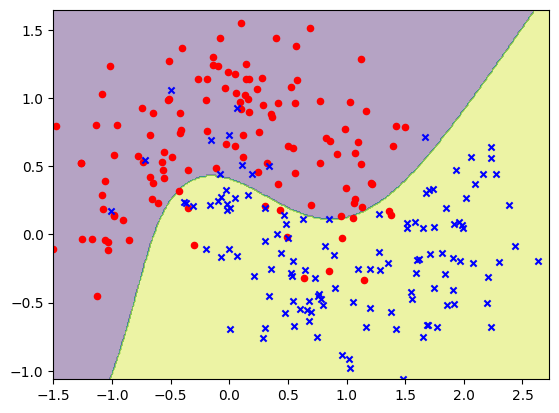

In [26]:
class_3 = LogisticRegression().fit(X_3, y)

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)
print(f"Точность модели: {class_3.score(X_3, y)*100} %")

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=20)

In [27]:
import time

def train_poly_class_model(X, y, deg):
  class_transform_n = PolynomialFeatures(degree=deg, include_bias=False)
  X_n = class_transform_n.fit_transform(X)

  start = time.time()
  class_n = LogisticRegression(
      max_iter=2000,
      solver='liblinear',
      C=0.5
      ).fit(X_n, y)
  end = time.time()

  sc_n = class_n.score(X_n, y)
  tm_n = end - start

  XX_df = pd.DataFrame(XX, columns=X.columns)
  Z_n = class_n.predict(class_transform_n.transform(XX_df)).reshape(xx.shape)

  plt.contourf(xx, yy, Z_n, alpha=0.4)
  plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100, label='Class 0')
  plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100, label='Class 1')
  plt.title(f"Полиномиальная регрессия, степень {deg}")
  plt.show()

  return sc_n, tm_n

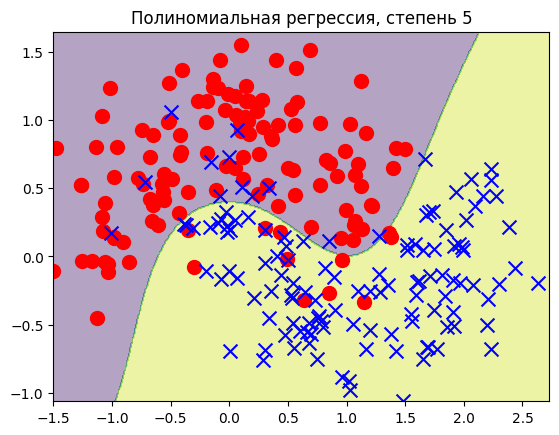

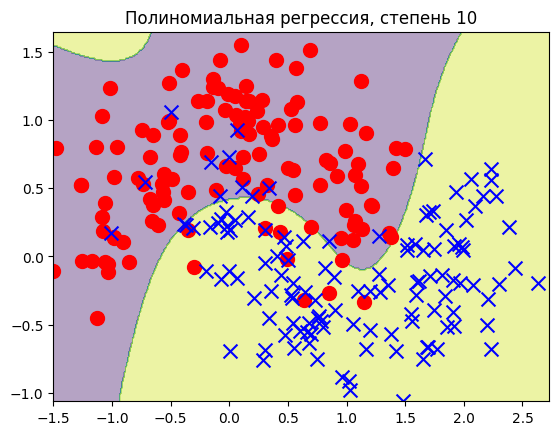

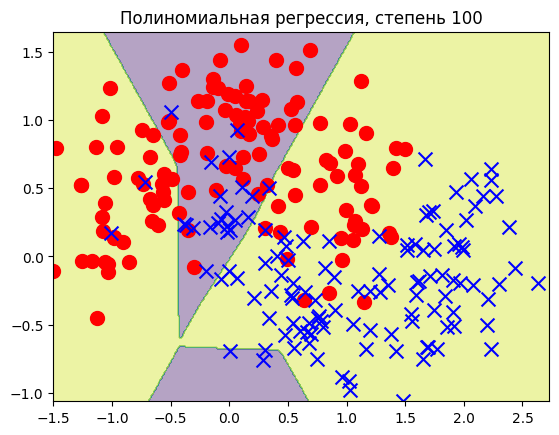

   Степень полинома  Точность (accuracy, %)  Время обучения (сек)
0                 5                    90.8                0.0032
1                10                    90.4                0.0058
2               100                    61.6                0.1811


In [28]:
results = []

for deg in degree:
  sc_n, tm_n = train_poly_class_model(X, y, deg)
  results.append({
      "Степень полинома": deg,
      "Точность (accuracy, %)": round(sc_n * 100, 2),
      "Время обучения (сек)": round(tm_n, 4)
  })

df_results = pd.DataFrame(results)
print(df_results)

Регрессия на реальных данных

Датасет

In [29]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [31]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
data_kc_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

Линейная регрессия

In [40]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
print(f"Точность модели: {reg_kc_multiple.score(X_kc_prices, y_kc_prices)*100:.2f}")

Точность модели: 69.97


График отклонения реальных значений от предсказканых

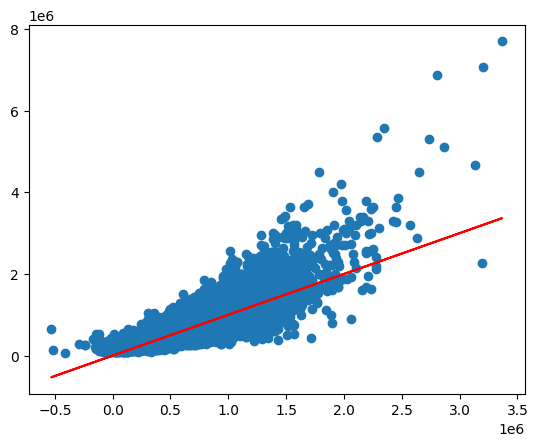

In [35]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Полиномиальная регрессия третьего порядка

In [39]:
X_2_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=2)).fit_transform(X_kc_prices)

reg_poly2_kc = LinearRegression().fit(X_2_kc_prices, y_kc_prices)
print(f"Точность модели: {reg_poly2_kc.score(X_2_kc_prices, y_kc_prices)*100:.1f}")
print(f"Коэффициенты: {reg_poly2_kc.coef_}")
print(f"Свободный коэффициент: {reg_poly2_kc.intercept_}")

Точность модели: 80.8
Коэффициенты: [-3.84970866e-03 -9.81801149e+00  3.77939335e+00 -2.03711121e+03
 -1.47670675e+02  6.77752519e+00  7.05470059e-01  6.83816524e+00
 -9.67809000e+00  8.88130717e+00  1.42087817e+04 -1.62459156e+04
 -2.48759043e+02  3.17877656e+04 -7.92870024e+01 -1.43958896e-02
  3.77813494e-01  1.47864017e+04  1.13689868e+03  5.78341700e+02
  2.30978510e+02 -1.43098929e+01  7.60264311e-02  1.36897294e+04
  1.05171698e+02  1.42260537e+03 -1.65060885e+03 -2.66847496e+03
 -3.83325479e+00 -1.04766701e+01 -1.45000028e+02 -7.02487524e+00
  3.89546624e+00 -1.16122785e+03  2.58995615e+02  1.35717565e+01
  1.83690384e-02 -2.98344290e+03  1.28337509e+01 -4.28534185e-01
 -2.43150433e+04  3.70010780e+02  5.86168446e+03 -9.59671567e+03
  1.86123726e+04  1.29224384e+01 -8.86862946e-02  2.04801514e+02
 -2.13662064e+01 -4.17757804e+00 -5.93560635e+02  2.91131892e+02
 -7.27208817e+00  1.80988720e-01 -1.99510865e-03 -2.47745139e-04
 -3.25274692e+00  1.15428968e+02 -7.28285914e+00  1.30

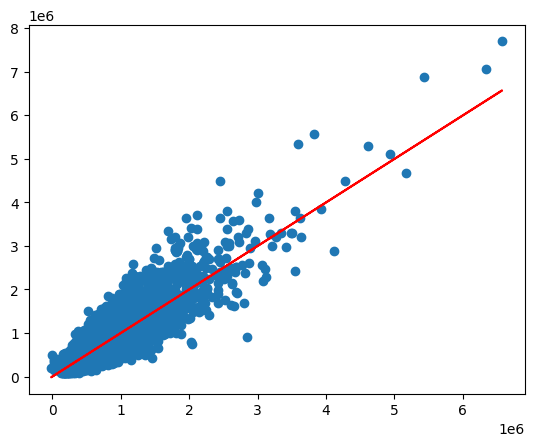

In [40]:
y_pred_kc_prices = reg_poly2_kc.predict(X_2_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

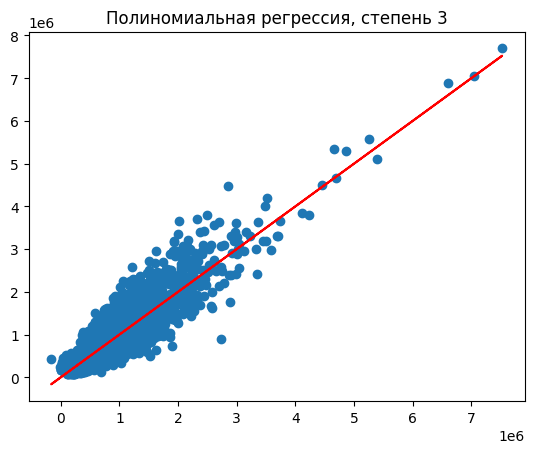

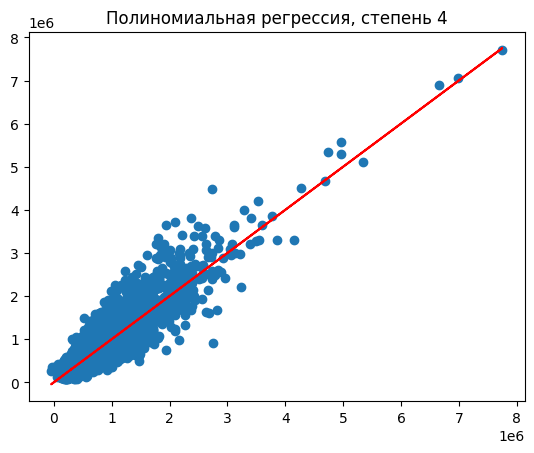

   Степень полинома  Точность (accuracy, %)  Время обучения (сек)
0                 3                   83.26                6.2947
1                 4                   82.46              353.0645


In [46]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)


def train_poly_multiple_model(X_kc_prices, y_kc_prices, deg):
  X_n_kc_prices = (poly_n_features_kc_prices := PolynomialFeatures(degree=deg)).fit_transform(X_kc_prices)

  start = time.time()
  reg_poly_n_kc = LinearRegression().fit(X_n_kc_prices, y_kc_prices)
  end = time.time()

  sc_n = reg_poly_n_kc.score(X_n_kc_prices, y_kc_prices)
  tm_n = end - start

  y_pred_n_kc_prices = reg_poly_n_kc.predict(X_n_kc_prices)
  plt.scatter(y_pred_n_kc_prices, y_kc_prices)
  plt.plot(y_pred_n_kc_prices, y_pred_n_kc_prices, c='r')
  plt.title(f"Полиномиальная регрессия, степень {deg}")
  plt.show()

  return sc_n, tm_n

degree = [3, 4]
results = []

for deg in degree:
  sc_n, tm_n = train_poly_multiple_model(X_kc_prices, y_kc_prices, deg)
  results.append({
      "Степень полинома": deg,
      "Точность (accuracy, %)": round(sc_n * 100, 2),
      "Время обучения (сек)": round(tm_n, 4)
  })

df_results = pd.DataFrame(results)
print(df_results)

Два самых значимых признака:
       Feature    Coefficient
14         lat  602748.226449
5   waterfront  582960.458423


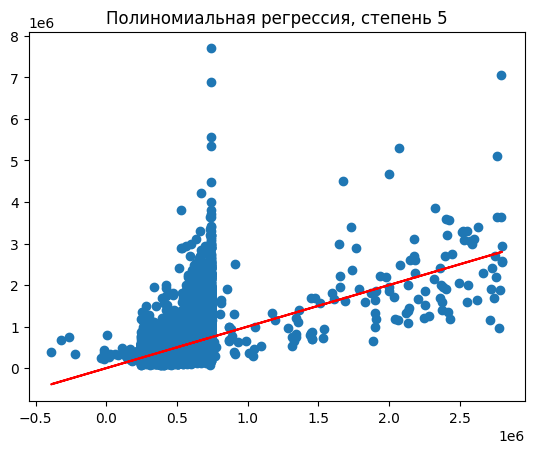

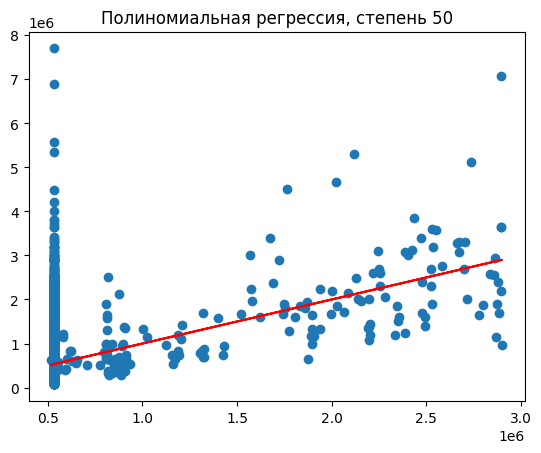

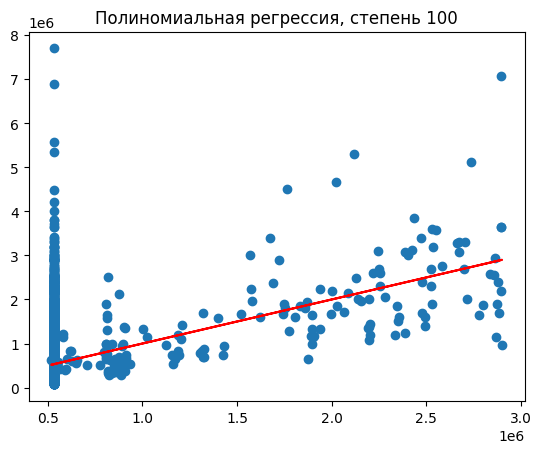

   Степень полинома  Точность (accuracy, %)  Время обучения (сек)
0                 5                   30.21                0.0673
1                50                   10.27                7.4649
2               100                   10.27              136.6993


In [48]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
coef_abs = np.abs(reg_kc_multiple.coef_)

coef_df = pd.DataFrame({
    'Feature': X_kc_prices.columns,
    'Coefficient': reg_kc_multiple.coef_,
    'Absolute Coefficient': coef_abs
})

coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print("Два самых значимых признака:")
print(coef_df_sorted[['Feature', 'Coefficient']].head(2))

top_features = coef_df_sorted['Feature'].head(2).values
X_kc_prices_selected = X_kc_prices[top_features]

scaler = StandardScaler()
X_kc_prices_scaled = scaler.fit_transform(X_kc_prices_selected)

def train_poly_multiple_model(X_kc_prices, y_kc_prices, deg):
    poly_n_features_kc_prices = PolynomialFeatures(degree=deg)
    X_n_kc_prices = poly_n_features_kc_prices.fit_transform(X_kc_prices)

    start = time.time()
    reg_poly_n_kc = LinearRegression().fit(X_n_kc_prices, y_kc_prices)
    end = time.time()

    sc_n = reg_poly_n_kc.score(X_n_kc_prices, y_kc_prices)
    tm_n = end - start

    y_pred_n_kc_prices = reg_poly_n_kc.predict(X_n_kc_prices)
    plt.scatter(y_pred_n_kc_prices, y_kc_prices)
    plt.plot(y_pred_n_kc_prices, y_pred_n_kc_prices, c='r')
    plt.title(f"Полиномиальная регрессия, степень {deg}")
    plt.show()

    return sc_n, tm_n

degree = [5, 50, 100]
results = []

for deg in degree:
    sc_n, tm_n = train_poly_multiple_model(X_kc_prices_scaled, y_kc_prices, deg)
    results.append({
        "Степень полинома": deg,
        "Точность (accuracy, %)": round(sc_n * 100, 2),
        "Время обучения (сек)": round(tm_n, 4)
    })

df_results = pd.DataFrame(results)
print(df_results)
